## BackPropagation & GradientPropagation

### `Creating Environment`

In [1]:
!pip install pytorch-lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.6/715.6 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 1.9 MB/s eta 0:00:00


In [2]:
!python --version

Python 3.9.16


In [3]:
!pip list | grep tensor

pytensor                      2.10.1
tensorboard                   2.11.2
tensorboard-data-server       0.6.1
tensorboard-plugin-wit        1.8.1
tensorflow                    2.11.0
tensorflow-datasets           4.8.3
tensorflow-estimator          2.11.0
tensorflow-gcs-config         2.11.0
tensorflow-hub                0.13.0
tensorflow-io-gcs-filesystem  0.31.0
tensorflow-metadata           1.12.0
tensorflow-probability        0.19.0


In [4]:
!pip list | grep torch

pytorch-lightning             2.0.0
torch                         1.13.1+cu116
torchaudio                    0.13.1+cu116
torchmetrics                  0.11.4
torchsummary                  1.5.1
torchtext                     0.14.1
torchvision                   0.14.1+cu116


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pytorch_lightning as pl
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from typing import Callable

### `Linear Regression & MSE`

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


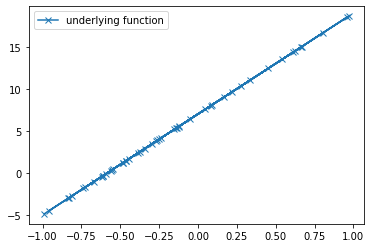

In [6]:
n = 50
d = 1
x = np.random.uniform(-1, 1, (n, d))
# y = 5x + 10
true_weights = np.array([[12],])
true_bias = np.array([7])

y_true = x @ true_weights + true_bias
print(f'x: {x.shape}, weights: {true_weights.shape}, bias: {true_bias.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

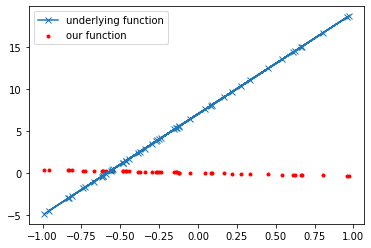

In [7]:
class Linear:
  def __init__(self, input_dim, num_hidden=1):
    self.wt = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    return x @ self.wt + self.bias

ln = Linear(d)
y_pred = ln(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()

In [8]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()
  
loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 64.29361430894018


### `Back Propagation`

In [9]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.wt = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.wt + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.wt.T
    return self.x_gradient

  def update(self, lr):
    self.wt = self.wt - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [10]:
loss = MSE()
ln = Linear(d)
y_pred = ln(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
ln.backward(loss_gradient)
ln.update(0.5)
y_pred = ln(x)
print(loss(y_pred, y_true))

72.85801392910838
32.68913807163537


### `Gradient Descent`


Epoch 0, loss 62.80406069043462
Epoch 5, loss 28.55295815348342
Epoch 10, loss 16.073229255823126


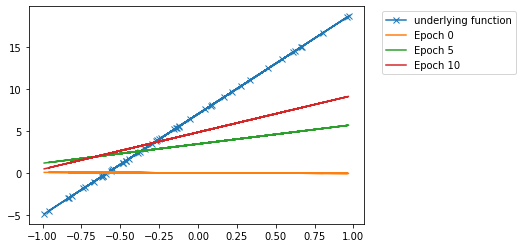

In [11]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
ln = Linear(d)

num_epochs = 15
lr = 0.1

for epoch in range(num_epochs):
  y_pred = ln(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')

  gradient_from_loss = loss.backward()
  ln.backward(gradient_from_loss)
  ln.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

## Non-Linear Regression without PyTorch

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


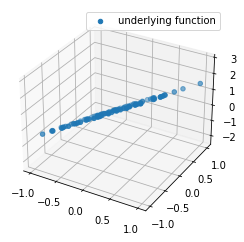

In [12]:
n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

true_weights = np.array([[2, -1], ]).T
true_bias = np.array([0.5])
print(x.shape, true_weights.shape, true_bias.shape)

y_true = x @ true_weights + true_bias
print(f'x: {x.shape}, weights: {true_weights.shape}, bias: {true_bias.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

1.5288179328290439


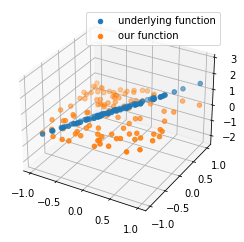

In [13]:
loss = MSE()
ln = Linear(2)
y_pred = ln(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 1.5288179328290439
Epoch 1, loss 1.3387699097436203
Epoch 2, loss 1.17321285404635
Epoch 3, loss 1.0288317253820956
Epoch 4, loss 0.9028002289611845
Epoch 5, loss 0.7926964731085914
Epoch 6, loss 0.6964370709128521
Epoch 7, loss 0.6122245476161239
Epoch 8, loss 0.5385046005048567
Epoch 9, loss 0.47393084423509046
Epoch 10, loss 0.4173353818880139
Epoch 11, loss 0.36770400877282355
Epoch 12, loss 0.32415516895274393
Epoch 13, loss 0.2859219984189012
Epoch 14, loss 0.2523369383912408
Epoch 15, loss 0.22281850936359068
Epoch 16, loss 0.19685991526446628
Epoch 17, loss 0.17401920650391278
Epoch 18, loss 0.15391077658378394
Epoch 19, loss 0.13619800322107442


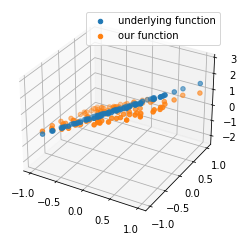

In [14]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model=ln, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, ln(x))

### Multi-Layer Perceptron

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


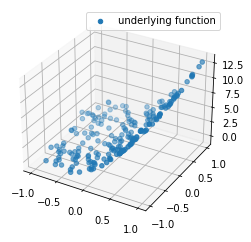

In [15]:
# Making non-linear data

n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

true_weights = np.array([[5, 1],]).T
true_bias = np.array([1])

y_true = (x ** 2) @ true_weights + x @ true_weights + true_bias
print(f'x: {x.shape}, weights: {true_weights.shape}, bias: {true_bias.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Epoch 0, loss 25.332032680972603
Epoch 1, loss 20.472437891926774
Epoch 2, loss 16.925885593355858
Epoch 3, loss 14.27520296023581
Epoch 4, loss 12.246352441266406
Epoch 5, loss 10.657791211176315
Epoch 6, loss 9.387951564913747
Epoch 7, loss 8.354331419565176
Epoch 8, loss 7.500026828388018
Epoch 9, loss 6.785037747281667
Epoch 10, loss 6.180637913783296
Epoch 11, loss 5.665713932359124
Epoch 12, loss 5.224371860838708
Epoch 13, loss 4.8443613369315415
Epoch 14, loss 4.516028493174698
Epoch 15, loss 4.2316121703597
Epoch 16, loss 3.9847641075483944
Epoch 17, loss 3.7702162072561283
Epoch 18, loss 3.583545188762807
Epoch 19, loss 3.4210024177447087
Epoch 20, loss 3.2793879358818474
Epoch 21, loss 3.1559549500002926
Epoch 22, loss 3.0483357110134444
Epoch 23, loss 2.9544827370178424
Epoch 24, loss 2.8726213008315984
Epoch 25, loss 2.8012103871581133
Epoch 26, loss 2.7389101702317213
Epoch 27, loss 2.6845546244296035
Epoch 28, loss 2.637128257591898
Epoch 29, loss 2.5957462137940546
Epoc

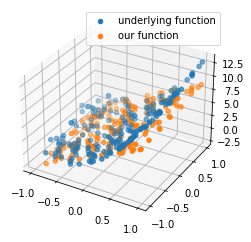

In [16]:
loss = MSE()
ln = Linear(d)
fit(x, y_true, model=ln, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, ln(x))

### Non-Linearity

In [17]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


### New Non-Linear Model

21.76783194832119


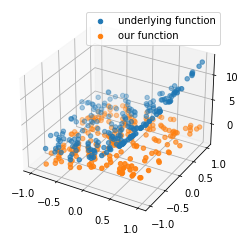

In [18]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.ln1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.ln2 = Linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.ln1(x)
    r = self.relu(l1)
    l2 = self.ln2(r)
    return l2
  
  def backward(self, output_gradient):
    ln2_gradient = self.ln2.backward(output_gradient)
    relu_gradient = self.relu.backward(ln2_gradient)
    ln1_gradient = self.ln1.backward(relu_gradient)
    # print('Model backward', ln2_gradient.shape, relu_gradient.shape, ln1_gradient.shape)
    # import pdb; pdb.set_trace()
    return ln1_gradient

  def update(self, lr):
    self.ln2.update(lr)
    self.ln1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [19]:
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

19.812470267746892
7.452118010061655


Epoch 0, loss 7.452118010061655
Epoch 1, loss 2.430747639181376
Epoch 2, loss 1.1340470906260744
Epoch 3, loss 0.7916916981773653
Epoch 4, loss 0.6448029024583332
Epoch 5, loss 0.5598803443315777
Epoch 6, loss 0.49761948428286173
Epoch 7, loss 0.44911200988048344
Epoch 8, loss 0.4106939164922355
Epoch 9, loss 0.3783608678018051
Epoch 10, loss 0.35072758079659766
Epoch 11, loss 0.32677691089764116
Epoch 12, loss 0.30556733670322606
Epoch 13, loss 0.2870977219473289
Epoch 14, loss 0.2717975351704901
Epoch 15, loss 0.2593863388835564
Epoch 16, loss 0.2488277110062824
Epoch 17, loss 0.23960434710113726
Epoch 18, loss 0.23149921772782328
Epoch 19, loss 0.22430863425410408
Epoch 20, loss 0.2178048901637442
Epoch 21, loss 0.2120442655009046
Epoch 22, loss 0.2069175051184905
Epoch 23, loss 0.20232906681049814
Epoch 24, loss 0.19823505278047107
Epoch 25, loss 0.19447512648228887
Epoch 26, loss 0.19102866323052056
Epoch 27, loss 0.18777835426447914
Epoch 28, loss 0.1848071204116833
Epoch 29, los

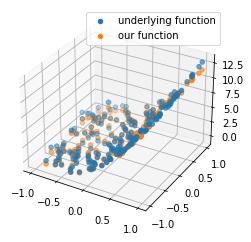

In [20]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x))

## Non-Linear Regression with PyTorch

In [21]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.ln1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.ln2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.ln1(x)
    r = self.relu(l1)
    l2 = self.ln2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(18.2583, grad_fn=<MseLossBackward0>)


In [22]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(18.2583, grad_fn=<MseLossBackward0>)
tensor(11.4804, grad_fn=<MseLossBackward0>)


tensor(11.4804, grad_fn=<MseLossBackward0>)
tensor(7.3323, grad_fn=<MseLossBackward0>)
tensor(4.9432, grad_fn=<MseLossBackward0>)
tensor(3.5738, grad_fn=<MseLossBackward0>)
tensor(2.6408, grad_fn=<MseLossBackward0>)
tensor(1.9986, grad_fn=<MseLossBackward0>)
tensor(1.5429, grad_fn=<MseLossBackward0>)
tensor(1.2194, grad_fn=<MseLossBackward0>)
tensor(0.9951, grad_fn=<MseLossBackward0>)
tensor(0.8352, grad_fn=<MseLossBackward0>)
tensor(0.7216, grad_fn=<MseLossBackward0>)
tensor(0.6373, grad_fn=<MseLossBackward0>)
tensor(0.5738, grad_fn=<MseLossBackward0>)
tensor(0.5248, grad_fn=<MseLossBackward0>)
tensor(0.4851, grad_fn=<MseLossBackward0>)
tensor(0.4523, grad_fn=<MseLossBackward0>)
tensor(0.4254, grad_fn=<MseLossBackward0>)
tensor(0.4028, grad_fn=<MseLossBackward0>)
tensor(0.3836, grad_fn=<MseLossBackward0>)
tensor(0.3669, grad_fn=<MseLossBackward0>)
tensor(0.3513, grad_fn=<MseLossBackward0>)
tensor(0.3373, grad_fn=<MseLossBackward0>)
tensor(0.3245, grad_fn=<MseLossBackward0>)
tensor(0.3

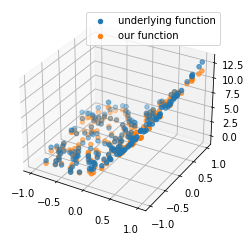

In [23]:
def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x_tensor).detach())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
 regression (Dense)          (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
7/7 [==============================] - 4s 5ms/step - loss: 10.0895
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 1.4823
Epoch 3/10
7/7 [==============================] - 0s 4ms/step - loss: 0.5133
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 0.9722
Epoch 5/10
7/7 

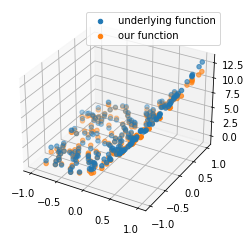

In [24]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_3d(x, y_true, model(x))

##Using PyTorch-Lightening

In [25]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.datasets import MNIST
from torchvision import transforms
import pytorch_lightning as pl

class LitAutoEncoder(pl.LightningModule):
	def __init__(self):
		super().__init__()
		self.encoder = nn.Sequential(
      nn.Linear(28 * 28, 64),
      nn.ReLU(),
      nn.Linear(64, 3))
		self.decoder = nn.Sequential(
      nn.Linear(3, 64),
      nn.ReLU(),
      nn.Linear(64, 28 * 28))

	def forward(self, x):
		embedding = self.encoder(x)
		return embedding

	def configure_optimizers(self):
		optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
		return optimizer

	def training_step(self, train_batch, batch_idx):
		x, y = train_batch
		x = x.view(x.size(0), -1)
		z = self.encoder(x)    
		x_hat = self.decoder(z)
		loss = F.mse_loss(x_hat, x)
		self.log('train_loss', loss)
		return loss

	def validation_step(self, val_batch, batch_idx):
		x, y = val_batch
		x = x.view(x.size(0), -1)
		z = self.encoder(x)
		x_hat = self.decoder(z)
		loss = F.mse_loss(x_hat, x)
		self.log('val_loss', loss)

# data
dataset = MNIST('', train=True, download=True, transform=transforms.ToTensor())
mnist_train, mnist_val = random_split(dataset, [55000, 5000])

train_loader = DataLoader(mnist_train, batch_size=1024)
val_loader = DataLoader(mnist_val, batch_size=1024)

# model
model = LitAutoEncoder()

# training
trainer = pl.Trainer(max_epochs=100)
trainer.fit(model, train_loader, val_loader)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type       | Params
---------------------------------------
0 | encoder | Sequential | 50.4 K
1 | decoder | Sequential | 51.2 K
---------------------------------------
101 K     Trainable params
0         Non-trainable params
101 K     Total params
0.407     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
